# Predicting Mortgage Backed Securities Prepayment Risk Prediction 

## Importing Data

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [8]:
df = pd.read_csv('LoanExport.csv')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


## Data Preprocessing

In [9]:
df.shape

(291451, 28)

In [10]:
# Checking informations about our features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [11]:
# Checking for missing values 
df.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [12]:
#Check if there's any categorical features in our data 
df.dtypes

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object

In [13]:
# Convert date feature to datetime format 
df['MaturityDate'] = df['MaturityDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

In [14]:
df['FirstPaymentDate'] = df['FirstPaymentDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

In [15]:
#Visualize the change on dtypes of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CreditScore         291451 non-null  int64         
 1   FirstPaymentDate    291451 non-null  datetime64[ns]
 2   FirstTimeHomebuyer  291451 non-null  object        
 3   MaturityDate        291451 non-null  datetime64[ns]
 4   MSA                 291451 non-null  object        
 5   MIP                 291451 non-null  int64         
 6   Units               291451 non-null  int64         
 7   Occupancy           291451 non-null  object        
 8   OCLTV               291451 non-null  int64         
 9   DTI                 291451 non-null  int64         
 10  OrigUPB             291451 non-null  int64         
 11  LTV                 291451 non-null  int64         
 12  OrigInterestRate    291451 non-null  float64       
 13  Channel             291451 no

In [17]:
#Count number of distinct elements in axis 0.
df.nunique()

CreditScore              370
FirstPaymentDate          66
FirstTimeHomebuyer         3
MaturityDate              96
MSA                      392
MIP                       37
Units                      5
Occupancy                  3
OCLTV                    102
DTI                       66
OrigUPB                  375
LTV                       97
OrigInterestRate         254
Channel                    4
PPM                        3
ProductType                1
PropertyState             53
PropertyType               7
PostalCode              1767
LoanSeqNum            291451
LoanPurpose                3
OrigLoanTerm              61
NumBorrowers               3
SellerName                20
ServicerName              20
EverDelinquent             2
MonthsDelinquent         174
MonthsInRepayment        212
dtype: int64

In [18]:
df["EverDelinquent"].value_counts()

0    233788
1     57663
Name: EverDelinquent, dtype: int64

In [19]:
print("Seller Name size: \n",df.SellerName.value_counts(),"\n\n")

Seller Name size: 
 Ot    76943
CO    34479
FL    25573
FI    24581
ST    22243
NO    16184
OL     7776
PR     7365
BA     7093
GM     6566
BI     6407
G      4734
CH     4599
CR     4459
FT     4105
WA     3139
AC     3076
HO     2970
PN     2407
RE     1758
Name: SellerName, dtype: int64 




In [20]:
#Return unique values 
df['FirstTimeHomebuyer'].unique()

array(['N', 'X', 'Y'], dtype=object)

In [21]:
# X means No
# Y means Yes
# X means Unknown value 

In [22]:
df['PPM'].unique()

array(['N', 'X', 'Y'], dtype=object)

In [23]:
df['NumBorrowers'].unique()

array(['2', '1', 'X '], dtype=object)

In [24]:
# X  means unknown value

In [25]:
#function for draw piechart
def draw_piechart(col,label):
  plt.figure(figsize=(10,10))
  plt.pie(data[col].value_counts(),shadow=True ,autopct='%.3f',labels=label)
  plt.show()

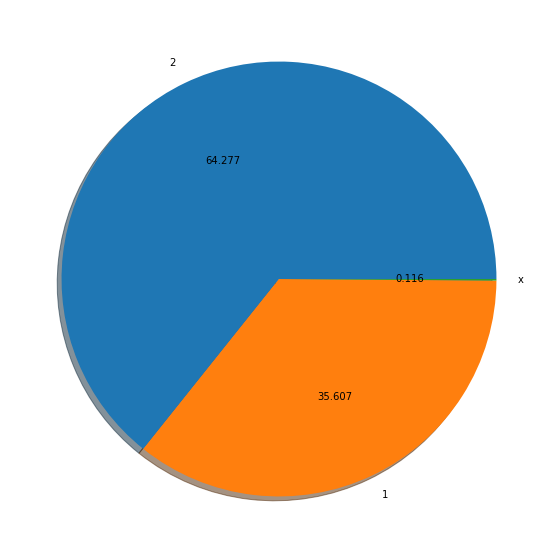

In [26]:
#draw piechart of NumBorrowers to see the distribution of its values 
label_arr=['2','1','x']
draw_piechart('NumBorrowers',label_arr)

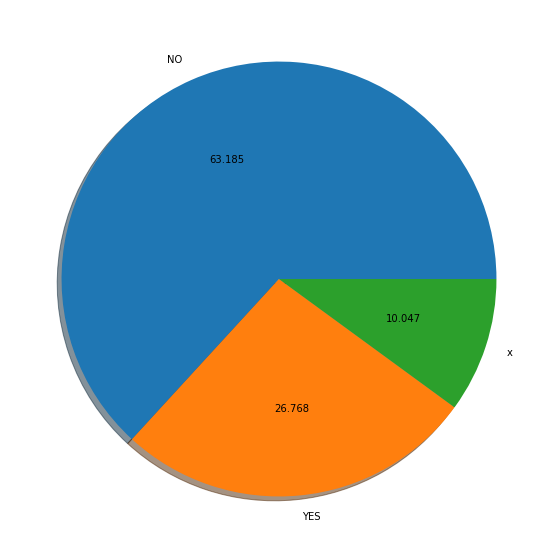

In [27]:
#draw piechart of FirstTimeHomebuyer to see the distribution of its values 
label_arr=['NO','YES','x']
draw_piechart('FirstTimeHomebuyer',label_arr)

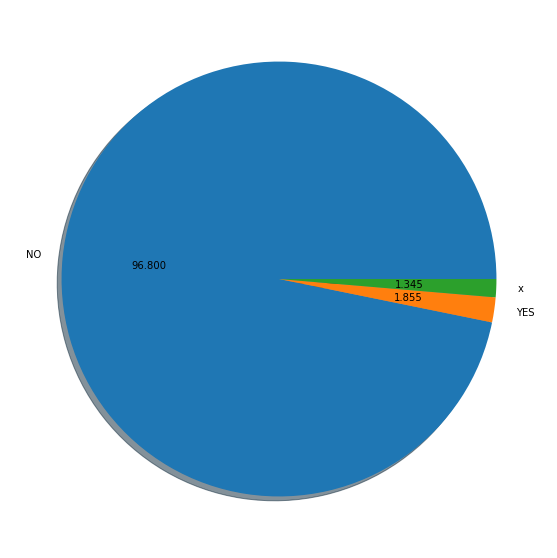

In [28]:
#draw piechart of PPM to see the distribution of its values 
label_arr=['NO','YES','x']
draw_piechart('PPM',label_arr)

In [29]:
df['Occupancy'].unique()

array(['O', 'I', 'S'], dtype=object)

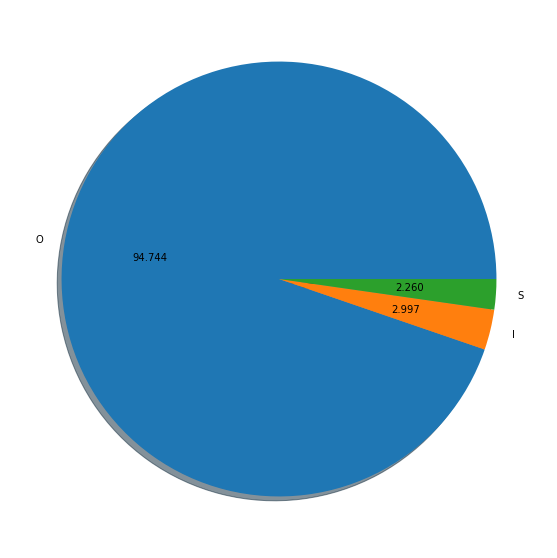

In [30]:
#draw piechart of Occupancy to see the distribution of its values 
label_arr=['O','I','S']
draw_piechart('Occupancy',label_arr)

In [31]:
df['PostalCode'].value_counts()

94500    2582
30000    2374
48100    2166
85200    2155
48000    1976
         ... 
10200       1
26600       1
16700       1
58800       1
79500       1
Name: PostalCode, Length: 1767, dtype: int64

In [32]:
df['LoanPurpose'].unique()

array(['P', 'N', 'C'], dtype=object)

In [33]:
df['LoanPurpose'].value_counts()

P    123404
N    110036
C     58011
Name: LoanPurpose, dtype: int64

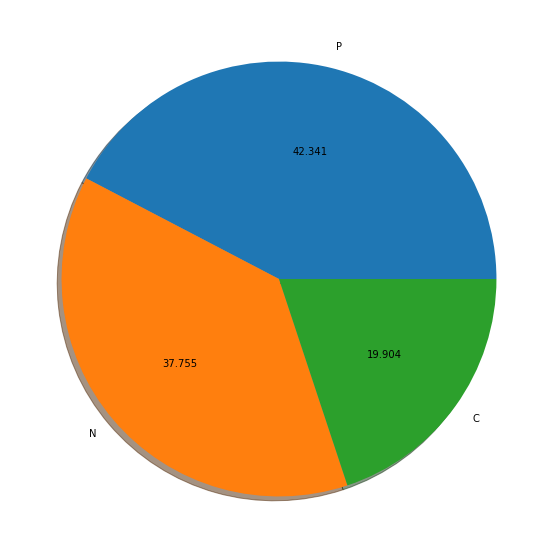

In [34]:
#draw piechart of LoanPurpose to see the distribution of its values 
label_arr=['P','N','C']
draw_piechart('LoanPurpose',label_arr)

In [35]:
#function for label encoding
def label_encoding(col):
  label_encoder = preprocessing.LabelEncoder()
  df[col]= label_encoder.fit_transform(df[col])

In [36]:
#Convert categorial feature to numerical one by label_encoding function
label_encoding('LoanPurpose')

In [37]:
df['Channel'].unique()

array(['T', 'R', 'C', 'B'], dtype=object)

In [38]:
#function to draw histogram
def draw_histogram(col,plottitle,xlabel,ylabel):
  plt.figure(figsize=(30,10))
  plt.hist(data[col],edgecolor='black')
  plt.title(plottitle)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

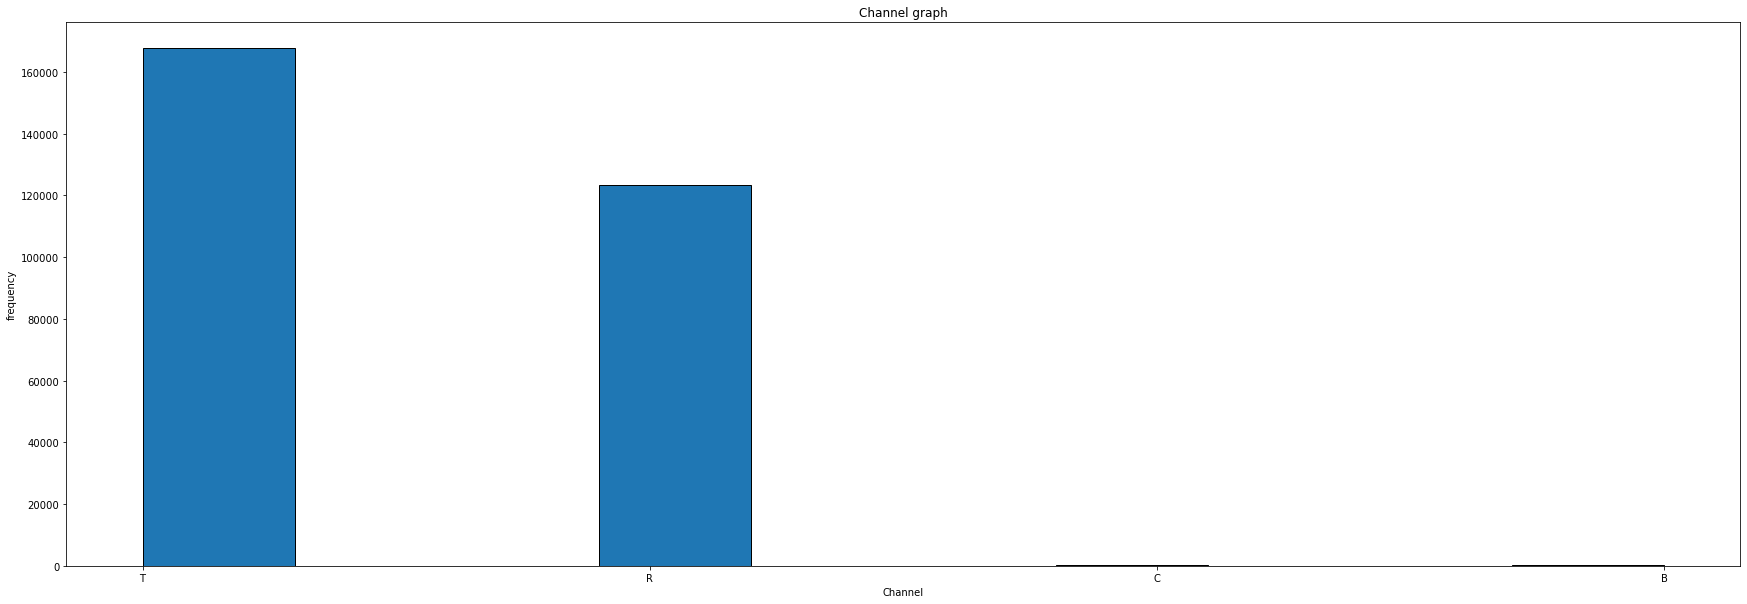

In [39]:
# Draw histogram to know the density of out categorical data: Channel
draw_histogram('Channel','Channel graph','Channel','frequency')

In [40]:
#Convert categorial feature to numerical one by label_encoding function
label_encoding('Channel')

In [41]:
df['PropertyState'].unique()

array(['IL', 'CO', 'KS', 'CA', 'NJ', 'WI', 'FL', 'CT', 'GA', 'TX', 'MD',
       'MA', 'SC', 'WY', 'NC', 'AZ', 'IN', 'MS', 'NY', 'WA', 'AR', 'VA',
       'MN', 'LA', 'PA', 'OR', 'RI', 'UT', 'MI', 'TN', 'AL', 'MO', 'IA',
       'NM', 'NV', 'VT', 'OH', 'NE', 'HI', 'ID', 'PR', 'DC', 'GU', 'KY',
       'NH', 'SD', 'ME', 'MT', 'OK', 'WV', 'DE', 'ND', 'AK'], dtype=object)

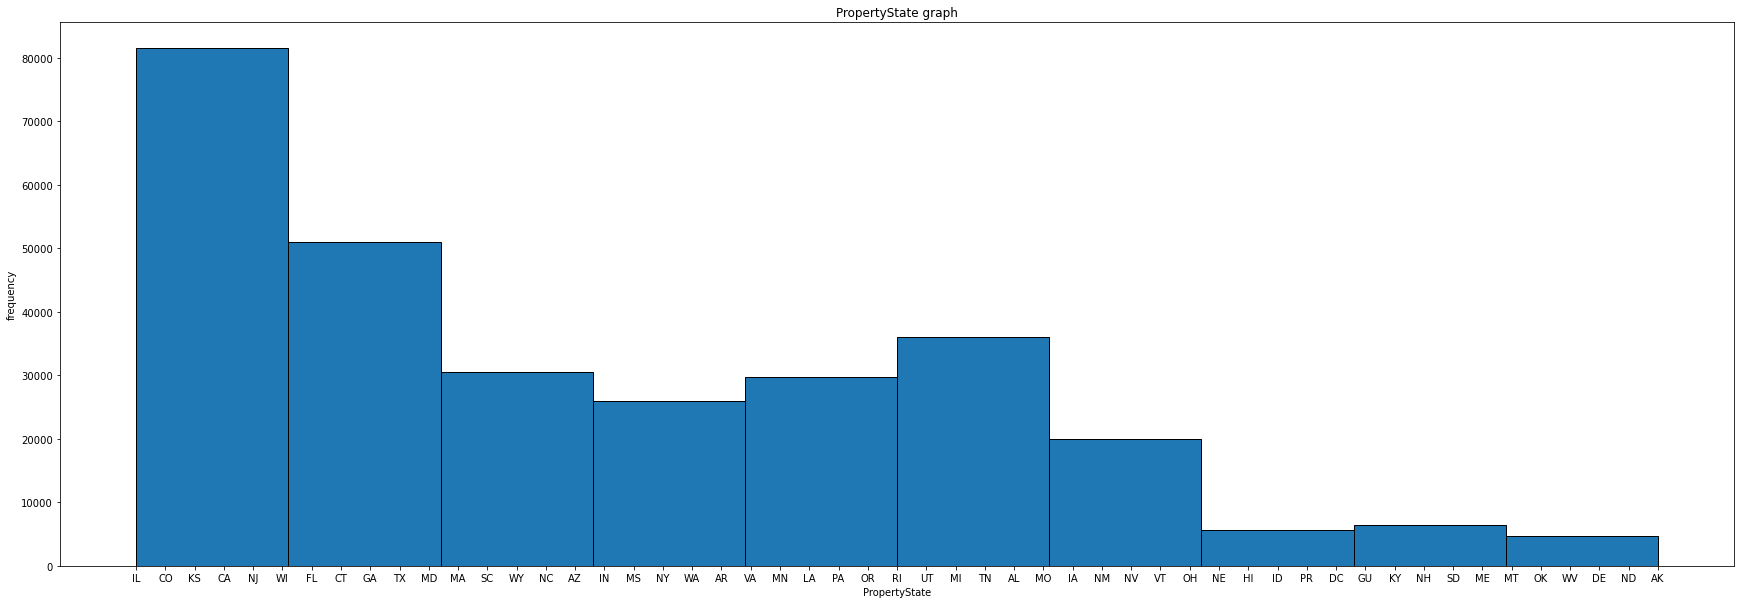

In [42]:
# Draw histogram to know the density of out categorical data: PropertyState
draw_histogram('PropertyState','PropertyState graph','PropertyState','frequency')

In [43]:
#Convert it to numerical 
label_encoding('PropertyState')

In [44]:
df['PropertyType'].unique()

array(['SF', 'PU', 'CO', 'MH', 'CP', 'LH', 'X '], dtype=object)

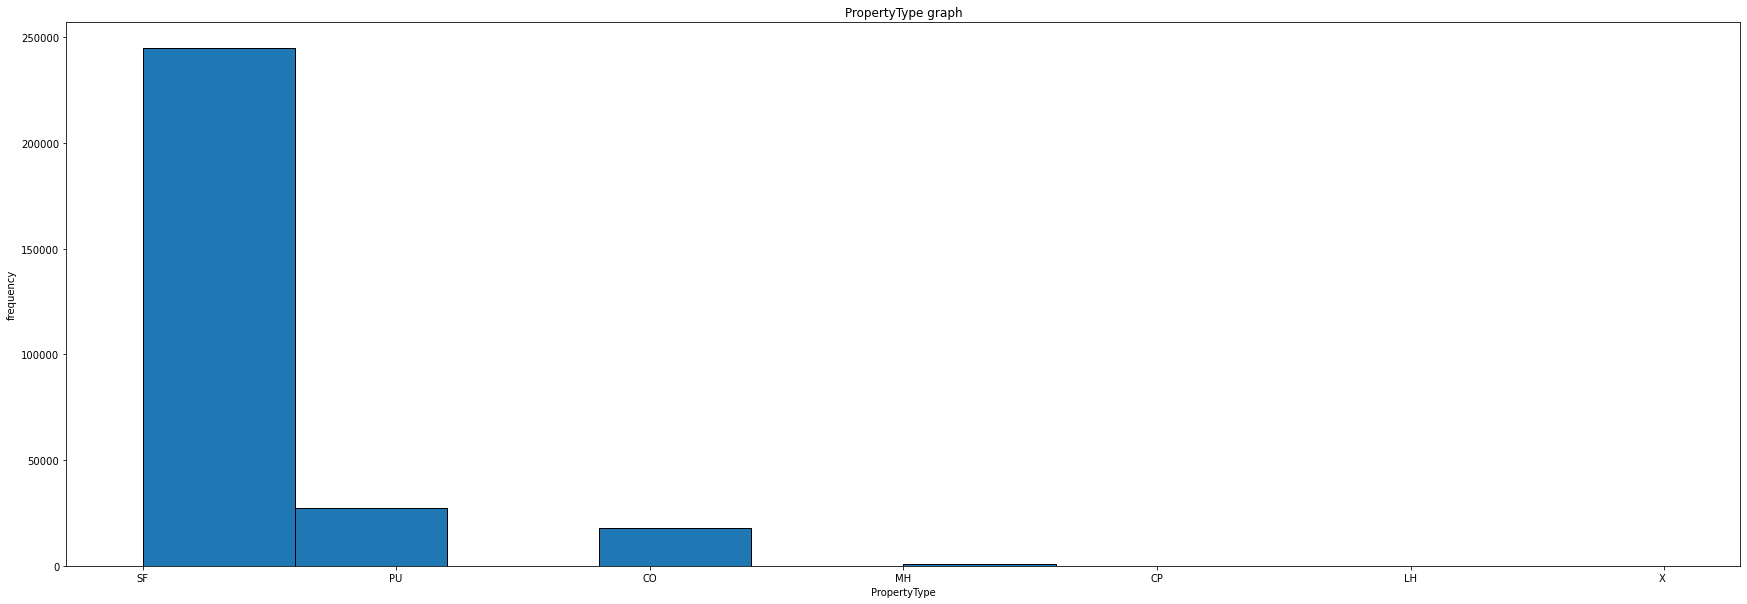

In [45]:
# Draw histogram to know the density of out categorical data: PropertyType
draw_histogram('PropertyType','PropertyType graph','PropertyType','frequency')

In [46]:
#Convert it to numerical 
label_encoding('PropertyType')

In [47]:
def one_hot_encoding(cols):
  one_hot_encoded_data = pd.get_dummies(data, columns = cols)
  return one_hot_encoded_data

In [53]:
#convert LoanPurpose and FirstTimeHomebuyer to numerical data by get_dummies function
encoded_data = pd.get_dummies(df['LoanPurpose'], prefix='LoanPurpose')
encoded_data2 = pd.get_dummies(df['FirstTimeHomebuyer'], prefix='FirstTimeHomebuyer')
data_temp = pd.concat([df, encoded_data], axis=1)
df=pd.concat([data_temp,encoded_data2], axis =1)
df.drop('LoanPurpose', axis=1,inplace=True)
df.drop('FirstTimeHomebuyer', axis =1 , inplace=True)

In [54]:
df.columns

Index(['CreditScore', 'FirstPaymentDate', 'MaturityDate', 'MSA', 'MIP',
       'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'OrigLoanTerm',
       'NumBorrowers', 'SellerName', 'ServicerName', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment', 'LoanPurpose_0',
       'LoanPurpose_1', 'LoanPurpose_2', 'FirstTimeHomebuyer_N',
       'FirstTimeHomebuyer_X', 'FirstTimeHomebuyer_Y'],
      dtype='object')

In [55]:
# Eliminating useless features 
df.drop(['FirstTimeHomebuyer_X','FirstTimeHomebuyer_N','ServicerName','SellerName','NumBorrowers','PropertyType','PropertyState','ProductType','PPM','Channel','Occupancy','MSA','MaturityDate','FirstPaymentDate'], inplace=True,axis=1)


In [56]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,PostalCode,LoanSeqNum,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_0,LoanPurpose_1,LoanPurpose_2,FirstTimeHomebuyer_Y
0,0,25,1,89,27,117000,89,6.750,60400,F199Q1268030,360,0,0,52,0,0,1,0
1,0,0,1,73,17,109000,73,6.500,80200,F199Q1015092,360,0,0,144,0,1,0,0
2,0,0,1,75,16,88000,75,6.875,66000,F199Q1266886,360,0,0,67,0,1,0,0
3,0,0,1,76,14,160000,76,6.875,90700,F199Q1178167,360,0,0,35,0,1,0,0
4,0,0,1,78,18,109000,78,7.125,7600,F199Q1178517,360,0,0,54,0,1,0,0


In [57]:
df.isnull().sum()

CreditScore             0
MIP                     0
Units                   0
OCLTV                   0
DTI                     0
OrigUPB                 0
LTV                     0
OrigInterestRate        0
PostalCode              0
LoanSeqNum              0
OrigLoanTerm            0
EverDelinquent          0
MonthsDelinquent        0
MonthsInRepayment       0
LoanPurpose_0           0
LoanPurpose_1           0
LoanPurpose_2           0
FirstTimeHomebuyer_Y    0
dtype: int64

In [58]:
df.drop(['PostalCode','LoanSeqNum'], axis=1,inplace=True)

In [60]:
#no more categorical variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CreditScore           291451 non-null  int64  
 1   MIP                   291451 non-null  int64  
 2   Units                 291451 non-null  int64  
 3   OCLTV                 291451 non-null  int64  
 4   DTI                   291451 non-null  int64  
 5   OrigUPB               291451 non-null  int64  
 6   LTV                   291451 non-null  int64  
 7   OrigInterestRate      291451 non-null  float64
 8   OrigLoanTerm          291451 non-null  int64  
 9   EverDelinquent        291451 non-null  int64  
 10  MonthsDelinquent      291451 non-null  int64  
 11  MonthsInRepayment     291451 non-null  int64  
 12  LoanPurpose_0         291451 non-null  uint8  
 13  LoanPurpose_1         291451 non-null  uint8  
 14  LoanPurpose_2         291451 non-null  uint8  
 15  

In [61]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_0,LoanPurpose_1,LoanPurpose_2,FirstTimeHomebuyer_Y
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1,0
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0,0
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0,0
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0,0
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0,0


In [62]:
df.describe()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_0,LoanPurpose_1,LoanPurpose_2,FirstTimeHomebuyer_Y
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291,0.199042,0.377545,0.423413,0.100470
std,68.408791,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599,0.399280,0.484774,0.494100,0.300626
min,0.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,675.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000
50%,717.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000
75%,753.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000,0.000000,1.000000,1.000000,0.000000
max,849.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
#draw the correlation matrix to see the relationship between variables
df.corr()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_0,LoanPurpose_1,LoanPurpose_2,FirstTimeHomebuyer_Y
CreditScore,1.000000,-0.164376,0.002808,-0.190848,-0.098740,0.003770,-0.191080,-0.119472,-0.008075,-0.207204,-0.150266,-0.005127,0.012689,-0.005176,-0.005175,-0.049881
MIP,-0.164376,1.000000,-0.042111,0.694789,0.111603,0.006729,0.695888,0.124544,0.014834,0.059993,0.051204,-0.087802,-0.326432,-0.156375,0.417212,0.264119
Units,0.002808,-0.042111,1.000000,-0.046133,0.012887,0.043827,-0.046032,0.074070,0.005348,0.010163,-0.004573,0.025594,0.002475,0.020492,-0.022105,-0.011075
OCLTV,-0.190848,0.694789,-0.046133,1.000000,0.114853,0.106273,0.999470,0.095268,0.018560,0.065528,0.059811,-0.094299,-0.310735,-0.142061,0.390483,0.242708
DTI,-0.098740,0.111603,0.012887,0.114853,1.000000,0.063640,0.114468,0.105216,0.028005,0.062109,0.040830,-0.007732,-0.003264,-0.063646,0.065082,0.056925
OrigUPB,0.003770,0.006729,0.043827,0.106273,0.063640,1.000000,0.105722,-0.128563,-0.008008,-0.067605,-0.067243,-0.211698,-0.043511,0.014162,0.021267,-0.031918
LTV,-0.191080,0.695888,-0.046032,0.999470,0.114468,0.105722,1.000000,0.095520,0.018477,0.065735,0.059930,-0.094596,-0.310805,-0.141873,0.390355,0.242869
OrigInterestRate,-0.119472,0.124544,0.074070,0.095268,0.105216,-0.128563,0.095520,1.000000,0.010794,0.060418,0.051706,-0.120378,-0.013966,-0.015458,0.026452,0.038733
OrigLoanTerm,-0.008075,0.014834,0.005348,0.018560,0.028005,-0.008008,0.018477,0.010794,1.000000,0.010348,0.006567,0.016591,0.016022,-0.032148,0.018593,0.014915
EverDelinquent,-0.207204,0.059993,0.010163,0.065528,0.062109,-0.067605,0.065735,0.060418,0.010348,1.000000,0.420048,0.232497,0.017766,0.004577,-0.018847,0.002109


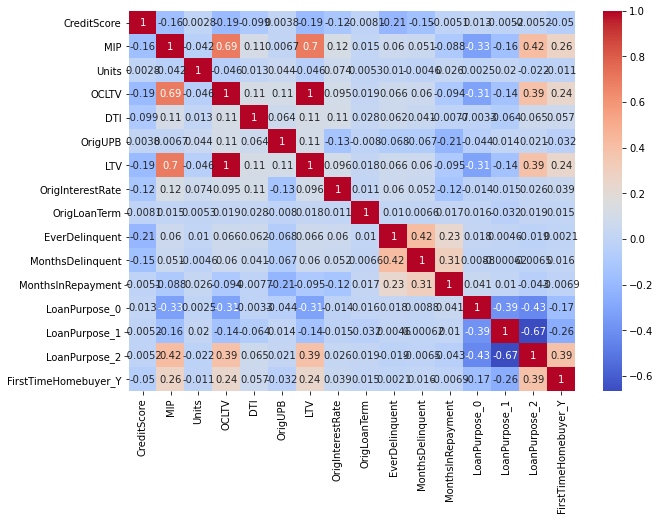

In [64]:
#sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
#show the correlation between data's features using heat map
# Generate correlation matrix
corr_matrix = df.corr()

# Set figure size
plt.figure(figsize=(10,7))

# Create heatmap with correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show plot
plt.show()

<AxesSubplot:>

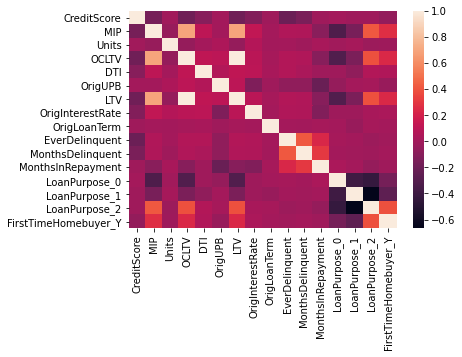

In [65]:
sns.heatmap(df.corr(),cmap='rocket')

## Handling Outliers

<AxesSubplot:>

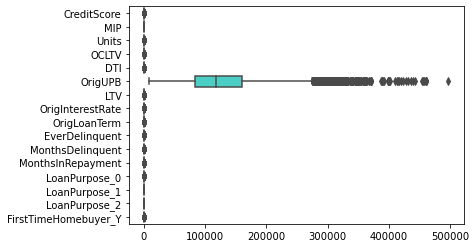

In [67]:
sns.boxplot(data=df,palette='rainbow',orient='h')
#box plot to all features to show outliers

In [567]:
#view individual boxplots to visualise outliers

In [70]:
#Function to draw boxplot
def draw_boxplot(col):
  sns.boxplot(data[col]) 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


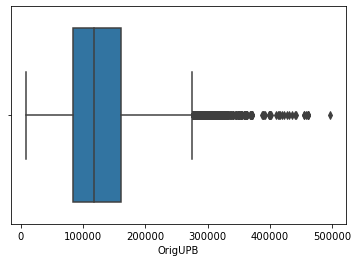

In [71]:
draw_boxplot('OrigUPB')

In [73]:
#drop outliers
def handle_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower=Q1-(1.5*IQR)
  upper=Q3+(1.5*IQR)
  return lower , upper
upp,low=handle_outlier(df['OrigUPB'])

In [74]:
df['OrigUPB']=np.where(df['OrigUPB']>upp,upp,df['OrigUPB'])
df['OrigUPB']=np.where(df['OrigUPB']<low,low,df['OrigUPB'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


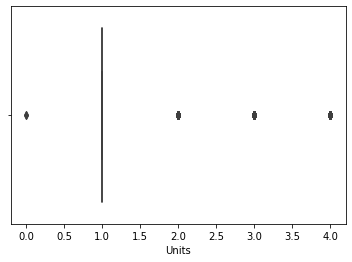

In [75]:
draw_boxplot('Units')

In [76]:
upper,lower=handle_outlier(df['Units'])

In [77]:
df['Units']=np.where(df['Units']>upper,upper,df['Units'])
df['Units']=np.where(df['Units']<lower,lower,df['Units'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


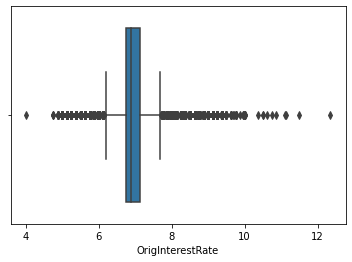

In [78]:
draw_boxplot('OrigInterestRate')

In [79]:
uppero,lowero=handle_outlier(df['OrigInterestRate'])

In [80]:
df['OrigInterestRate']=np.where(df['OrigInterestRate']>uppero,uppero,df['OrigInterestRate'])
df['OrigInterestRate']=np.where(df['OrigInterestRate']<lowero,lowero,df['OrigInterestRate'])

In [81]:
#checking for duplicates values to drop them
duplicate=df.duplicated()
print(duplicate.sum())

2138


In [82]:
data=df.drop_duplicates()

In [84]:
duplicate=data.duplicated()
print(duplicate.sum())

0


In [85]:
data.shape

(289313, 16)

In [88]:
data.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_0,LoanPurpose_1,LoanPurpose_2,FirstTimeHomebuyer_Y
0,0,25,1.0,89,27,275500.0,89,7.6875,360,0,0,52,0,0,1,0
1,0,0,1.0,73,17,275500.0,73,7.6875,360,0,0,144,0,1,0,0
2,0,0,1.0,75,16,275500.0,75,7.6875,360,0,0,67,0,1,0,0
3,0,0,1.0,76,14,275500.0,76,7.6875,360,0,0,35,0,1,0,0
4,0,0,1.0,78,18,275500.0,78,7.6875,360,0,0,54,0,1,0,0
